# Seattle Wheather

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
df = pd.read_csv('seattle-weather.csv')

In [26]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [28]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [29]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [30]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


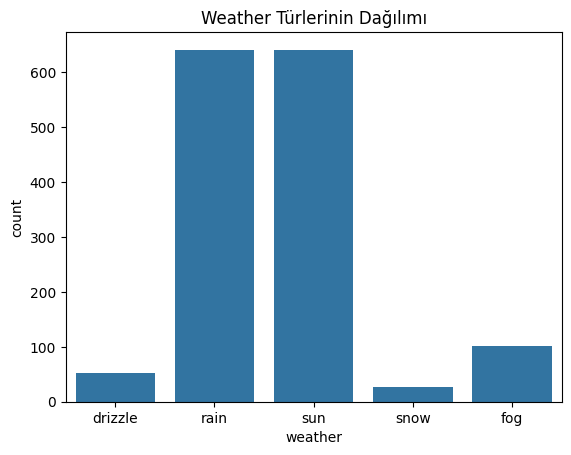

In [31]:
sns.countplot(x='weather', data=df)
plt.title("Weather Türlerinin Dağılımı")
plt.show()

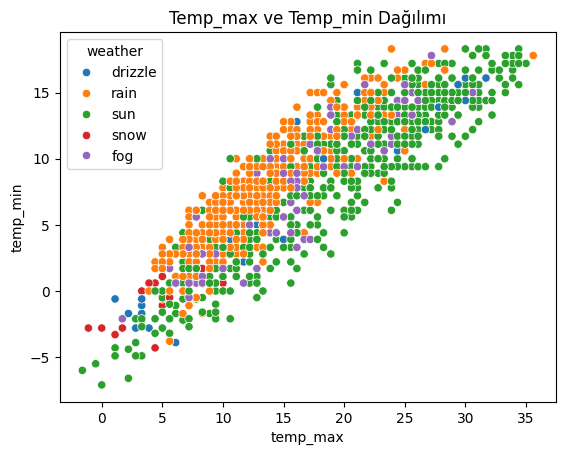

In [32]:
# Temp_min ve temp_max'in ilişkisinin görselleştirilmesi
sns.scatterplot(x='temp_max', y='temp_min', hue='weather', data=df)
plt.title("Temp_max ve Temp_min Dağılımı")
plt.show()

## Naive Bayes Algorithm

In [33]:
# Tarih sütunu gereksiz, bu yüzden çıkarıyoruz
df1 = df.drop(columns=['date'])

In [34]:
weather_mapping = {
    'drizzle': 0,
    'rain': 1,
    'sun': 2,
    'snow': 3,
    'fog': 4
}

In [35]:

df1['weather_encoded'] = df1['weather'].map(weather_mapping)

In [45]:
# 'weather_encoded' etiketimiz olacak, geri kalanı özellik
X1 = df1.drop(columns=['weather', 'weather_encoded'])
y1 = df1['weather_encoded']

In [46]:
# 6. Eğitim ve Test Setine Ayırma
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [38]:
naive_bayes_model = GaussianNB()

In [47]:
naive_bayes_model.fit(X1_train, y1_train)

GaussianNB()

In [48]:
y1_pred = naive_bayes_model.predict(X1_test)

In [49]:
print("Accuracy: ", accuracy_score(y1_test, y1_pred))  # Doğruluk oranı
print("Classification Report: \n", classification_report(y1_test, y1_pred))  # Ayrıntılı rapor


Accuracy:  0.8293515358361775
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.96      0.91      0.94       120
           2       0.76      0.99      0.86       131
           3       0.57      0.50      0.53         8
           4       0.00      0.00      0.00        25

    accuracy                           0.83       293
   macro avg       0.46      0.48      0.47       293
weighted avg       0.75      0.83      0.78       293



c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

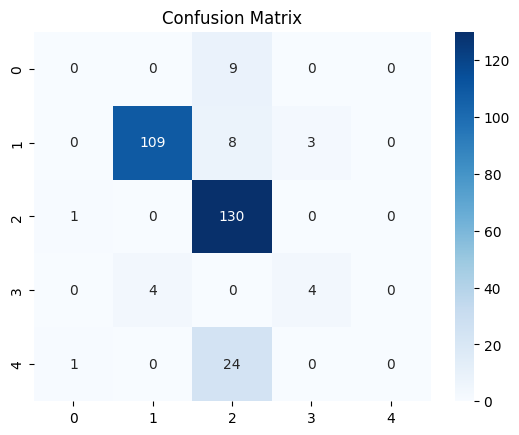

In [50]:
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

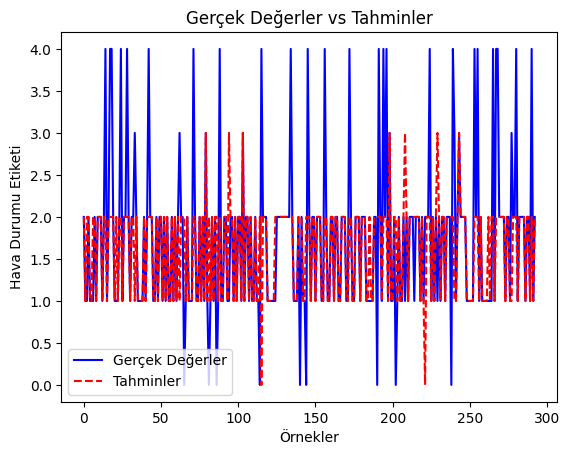

In [51]:
# Tahmin yapalım
y_pred = naive_bayes_model.predict(X1_test)

# Grafik üzerinde doğrulukları gösterelim
plt.plot(y1_test.values, label='Gerçek Değerler', color='blue')
plt.plot(y1_pred, label='Tahminler', color='red', linestyle='--')
plt.title('Gerçek Değerler vs Tahminler')
plt.xlabel('Örnekler')
plt.ylabel('Hava Durumu Etiketi')
plt.legend()
plt.show()

## Decision Trees

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [52]:
# Özellikler ve hedef değişken
X2 = df1[['precipitation', 'temp_max', 'temp_min', 'wind']]
y2 = df1['weather_encoded']


In [53]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [54]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=42)

In [55]:
y2_pred = dt_model.predict(X2_test)

In [56]:
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))
print("Accuracy:", accuracy_score(y2_test, y2_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.90      0.88      0.89       120
           2       0.78      0.77      0.77       131
           3       0.36      0.50      0.42         8
           4       0.24      0.20      0.22        25

    accuracy                           0.73       293
   macro avg       0.46      0.47      0.46       293
weighted avg       0.75      0.73      0.74       293

Accuracy: 0.7337883959044369


In [58]:
conf_matrix = confusion_matrix(y2_test, y2_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[  0   0   8   0   1]
 [  1 105   7   7   0]
 [ 11   4 101   0  15]
 [  0   4   0   4   0]
 [  2   4  14   0   5]]


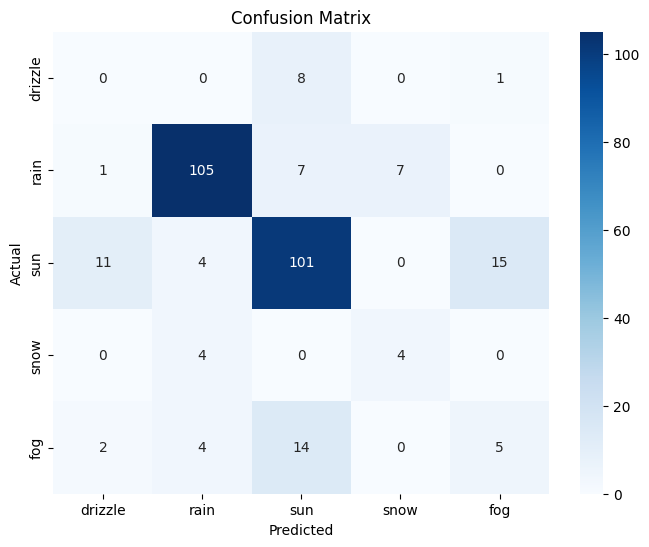

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=weather_mapping.keys(), yticklabels=weather_mapping.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

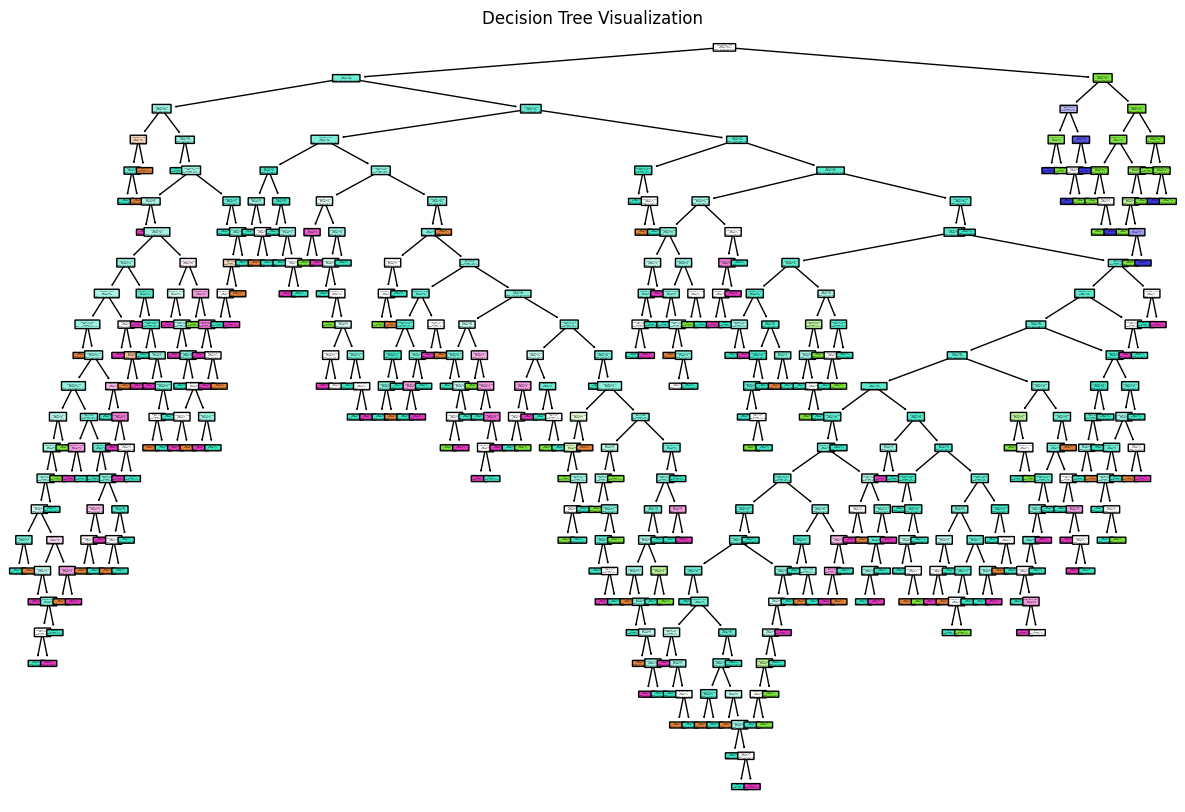

In [60]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X2.columns, class_names=[str(i) for i in weather_mapping.keys()], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [61]:
feature_importances = pd.DataFrame({'Feature': X2.columns, 'Importance': dt_model.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

C:\Users\csm_h\AppData\Local\Temp\ipykernel_22756\2498930661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


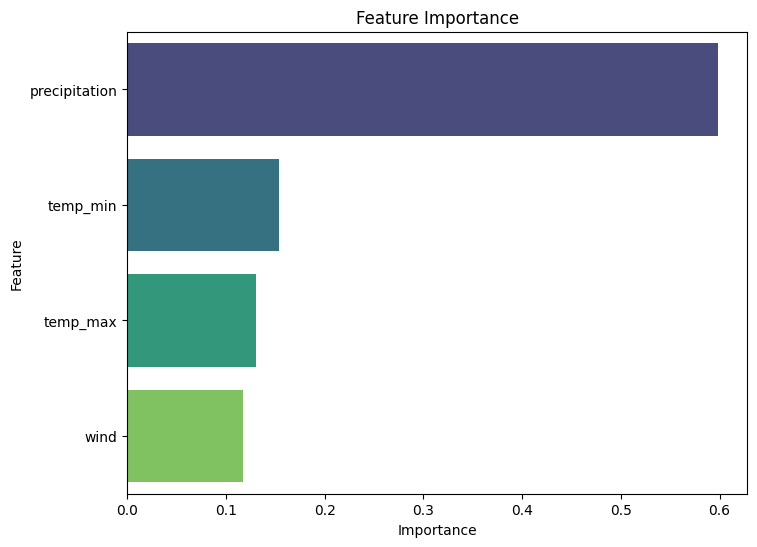

In [62]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()